In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots


In [2]:
class ModelTask2(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:

                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """



        super().__init__()
        # TODO: Implement this function (Task  2a)

        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential( # The output of feature_extractor_1 will be [batch_size, num_filters, 16, 16]            #Layer1
            #Layer 1
            nn.Conv2d(
                in_channels=3,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #Layer 2
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            #Layer 3
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        
        #Fully connected below
        self.fc = nn.Sequential(
            nn.Linear(128*4*4, 64), #after 3 maxpools where each halves "x-y" dimensions
            nn.ReLU(),
            nn.Linear(64, 10),
        )

        self.num_output_features = 32*32*32
        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
       

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        # TODO: Implement this function (Task  2a)
        batch_size = x.shape[0]
        out = x
        expected_shape = (batch_size, self.num_classes)
        out = self.feature_extractor(out)
        out = out.view(batch_size, -1)
        out = self.fc(out)  
        
        
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [3]:
epochs = 10
batch_size = 64
learning_rate = 5e-2 # Should be 5e-5 for LeNet
early_stop_count = 10
dataloaders = load_cifar10(batch_size)
model_1 = ModelTask2(image_channels=3, num_classes=10)
trainer_1 = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model_1,
    dataloaders,
)
trainer_1.train()

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

ModelTask2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=2048, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 35.99, Global step:    351, Validation Loss: 1.68, Validation Accuracy: 0.399


 10%|█         | 1/10 [00:19<02:53, 19.24s/it]

Epoch: 0, Batches per seconds: 36.56, Global step:    702, Validation Loss: 1.39, Validation Accuracy: 0.490
Epoch: 1, Batches per seconds: 36.49, Global step:   1053, Validation Loss: 1.27, Validation Accuracy: 0.544


 20%|██        | 2/10 [00:38<02:33, 19.25s/it]

Epoch: 1, Batches per seconds: 36.52, Global step:   1404, Validation Loss: 1.13, Validation Accuracy: 0.594
Epoch: 2, Batches per seconds: 36.44, Global step:   1755, Validation Loss: 1.06, Validation Accuracy: 0.628


 30%|███       | 3/10 [00:57<02:14, 19.27s/it]

Epoch: 2, Batches per seconds: 36.47, Global step:   2106, Validation Loss: 0.97, Validation Accuracy: 0.649
Epoch: 3, Batches per seconds: 36.38, Global step:   2457, Validation Loss: 0.98, Validation Accuracy: 0.655


 40%|████      | 4/10 [01:17<01:55, 19.32s/it]

Epoch: 3, Batches per seconds: 36.40, Global step:   2808, Validation Loss: 0.87, Validation Accuracy: 0.689
Epoch: 4, Batches per seconds: 36.33, Global step:   3159, Validation Loss: 0.87, Validation Accuracy: 0.695


 50%|█████     | 5/10 [01:36<01:36, 19.32s/it]

Epoch: 4, Batches per seconds: 36.39, Global step:   3510, Validation Loss: 0.80, Validation Accuracy: 0.720
Epoch: 5, Batches per seconds: 36.33, Global step:   3861, Validation Loss: 0.77, Validation Accuracy: 0.731


 60%|██████    | 6/10 [01:56<01:17, 19.37s/it]

Epoch: 5, Batches per seconds: 36.34, Global step:   4212, Validation Loss: 0.76, Validation Accuracy: 0.731
Epoch: 6, Batches per seconds: 36.27, Global step:   4563, Validation Loss: 0.82, Validation Accuracy: 0.718


 70%|███████   | 7/10 [02:15<00:58, 19.38s/it]

Epoch: 6, Batches per seconds: 36.32, Global step:   4914, Validation Loss: 0.75, Validation Accuracy: 0.737
Epoch: 7, Batches per seconds: 36.27, Global step:   5265, Validation Loss: 0.75, Validation Accuracy: 0.745
Epoch: 7, Batches per seconds: 36.33, Global step:   5616, Validation Loss: 0.75, Validation Accuracy: 0.742


 80%|████████  | 8/10 [02:34<00:38, 19.36s/it]

Epoch: 8, Batches per seconds: 36.29, Global step:   5967, Validation Loss: 0.77, Validation Accuracy: 0.739
Epoch: 8, Batches per seconds: 36.31, Global step:   6318, Validation Loss: 0.76, Validation Accuracy: 0.746


 90%|█████████ | 9/10 [02:54<00:19, 19.39s/it]

Epoch: 9, Batches per seconds: 36.25, Global step:   6669, Validation Loss: 0.77, Validation Accuracy: 0.752
Epoch: 9, Batches per seconds: 36.27, Global step:   7020, Validation Loss: 0.78, Validation Accuracy: 0.751


100%|██████████| 10/10 [03:13<00:00, 19.38s/it]


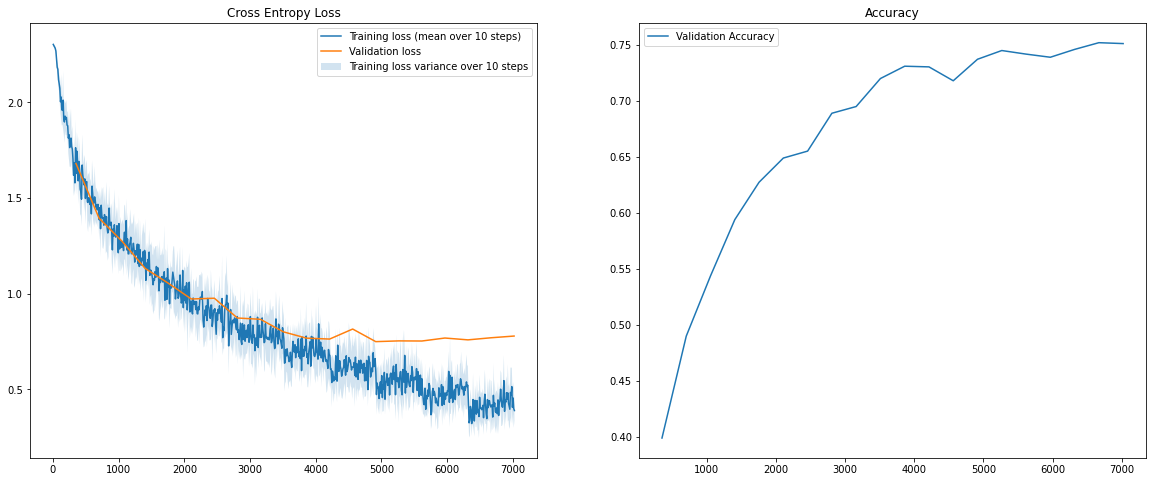

In [4]:
create_plots(trainer_1, "task2")

In [5]:

test_set = trainer_1.dataloader_test
val_set = trainer_1.dataloader_val
train_set = trainer_1.dataloader_train

model_1.eval()
#create_plots(trainer, "task2_1")
print(compute_loss_and_accuracy(dataloader=test_set,model = model_1, loss_criterion=nn.CrossEntropyLoss()))
print(compute_loss_and_accuracy(dataloader=val_set,model = model_1, loss_criterion=nn.CrossEntropyLoss()))
print(compute_loss_and_accuracy(dataloader=train_set,model = model_1, loss_criterion = nn.CrossEntropyLoss()))

(tensor(0.8290, device='cuda:0'), 0.7431)
(tensor(0.7754, device='cuda:0'), 0.7486)
(tensor(0.3244, device='cuda:0'), 0.8920697012802276)
